<h1 align=center><font size = 5> Part 6 & 7 Ice Cream Truck New Business Evaluation for Phoenix, Arizona</font></h1>

In [59]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


<a id='item1'></a>

## Part 6: Examine Phoenix Household Demographics

In [2]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [5]:
Household_data = pd.read_csv("https://www.phoenixopendata.com/dataset/33ab1c58-d8a9-46fc-b65e-50a62d8eb928/resource/29c9d1b5-3620-4622-909c-e3b2eab59a35/download/phoenix-az-household-type.csv", index_col=False)
Household_data.head()

,geoid,year,Total,Family households,Family households- Married-couple family,Family households- Other family,"Family households- Other family- Male householder,no wife","Family households- Other family- Female householder,no husband",Nonfamily households,Nonfamily households- Householder living alone,Nonfamily households- Householder not living alone
0,16000US0455000,2008,493898,308067,208802,99265,33169,66096,185831,145290,40541
1,16000US0455000,2009,516655,335343,227967,107376,34635,72741,181312,144382,36930
2,16000US0455000,2010,511432,326132,215746,110386,31407,78979,185300,145407,39893
3,16000US0455000,2011,519369,329717,216329,113388,35719,77669,189652,150800,38852
4,16000US0455000,2012,521555,326255,208149,118106,33709,84397,195300,152745,42555


In [6]:
Household_data.drop(['geoid'], axis=1, inplace=True)

In [7]:
Household_data.head()

,year,Total,Family households,Family households- Married-couple family,Family households- Other family,"Family households- Other family- Male householder,no wife","Family households- Other family- Female householder,no husband",Nonfamily households,Nonfamily households- Householder living alone,Nonfamily households- Householder not living alone
0,2008,493898,308067,208802,99265,33169,66096,185831,145290,40541
1,2009,516655,335343,227967,107376,34635,72741,181312,144382,36930
2,2010,511432,326132,215746,110386,31407,78979,185300,145407,39893
3,2011,519369,329717,216329,113388,35719,77669,189652,150800,38852
4,2012,521555,326255,208149,118106,33709,84397,195300,152745,42555


In [8]:
Household_data.set_index('year', inplace=True)
Household_data.head()

,Total,Family households,Family households- Married-couple family,Family households- Other family,"Family households- Other family- Male householder,no wife","Family households- Other family- Female householder,no husband",Nonfamily households,Nonfamily households- Householder living alone,Nonfamily households- Householder not living alone
year,,,,,,,,,
2008,493898,308067,208802,99265,33169,66096,185831,145290,40541
2009,516655,335343,227967,107376,34635,72741,181312,144382,36930
2010,511432,326132,215746,110386,31407,78979,185300,145407,39893
2011,519369,329717,216329,113388,35719,77669,189652,150800,38852
2012,521555,326255,208149,118106,33709,84397,195300,152745,42555


In [9]:
Family_Households = Household_data['Family households']
Family_Households.head()

year
2008    308067
2009    335343
2010    326132
2011    329717
2012    326255
Name: Family households, dtype: int64

Text(0.5, 0, 'Years')

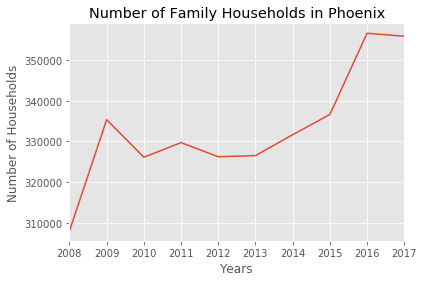

In [10]:
Family_Households.plot(kind='line')

plt.title('Number of Family Households in Phoenix')
plt.ylabel('Number of Households')
plt.xlabel('Years')


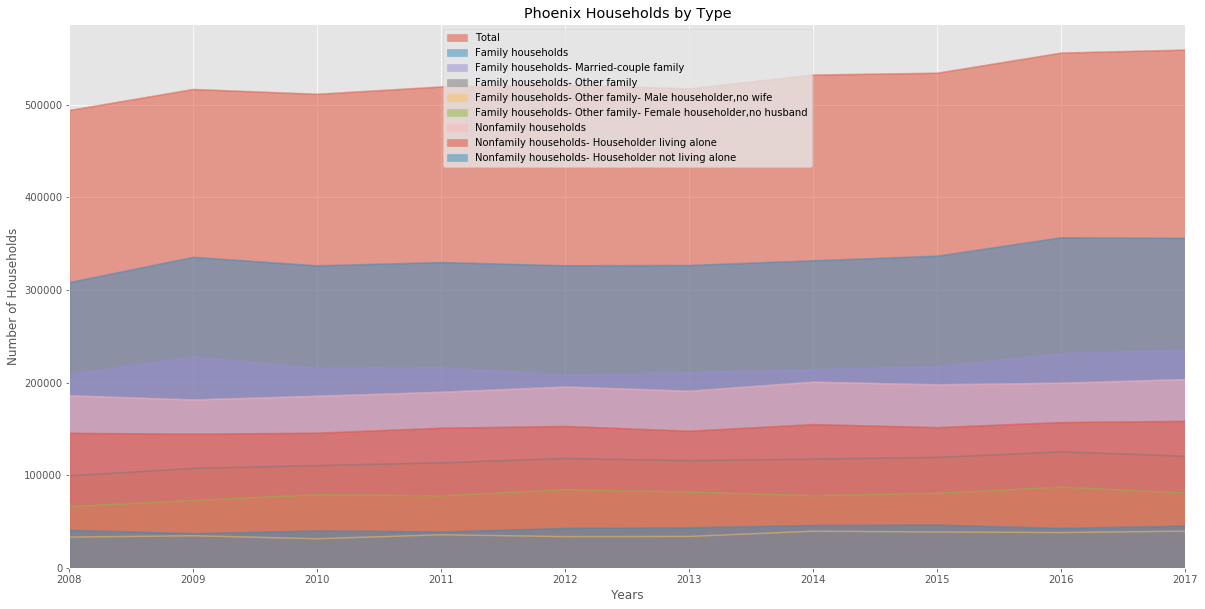

In [11]:

Household_data.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Phoenix Households by Type')
plt.ylabel('Number of Households')
plt.xlabel('Years')

plt.show()

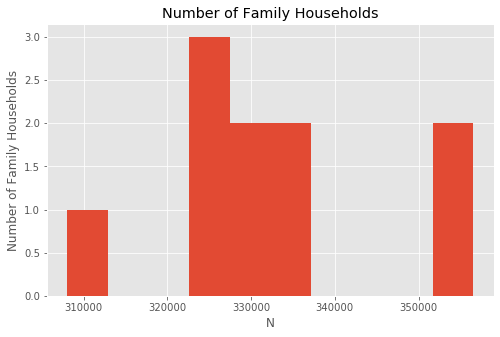

In [12]:
Family_Households.plot(kind='hist', figsize=(8, 5))

plt.title('Number of Family Households') # add a title to the histogram
plt.ylabel('Number of Family Households') # add y-label
plt.xlabel('N') # add x-label

plt.show()

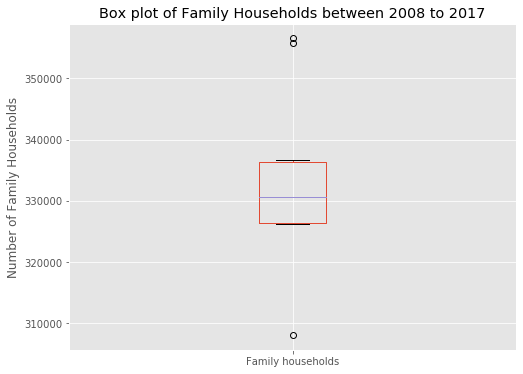

In [13]:
Family_Households.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Family Households between 2008 to 2017')
plt.ylabel('Number of Family Households')

plt.show()

## Part 7: Examine Phoenix Age Demographics

In [67]:
data1 = pd.read_csv("https://www.phoenixopendata.com/dataset/fd0400b1-f62f-4d4e-9a88-253798891158/resource/6f460cd1-d0aa-4005-aadb-c371772cbd7b/download/phoenixazdemographic.csv", index_col=False)
data1.head(6)

,year,title_field,value
0,2015,Total Population,1563001
1,2015,Male Population,786833
2,2015,Male Under 5 years,60464
3,2015,Male 5 to 9 years,60456
4,2015,Male 10 to 14 years,61339
5,2015,Male 15 to 17 years,33349


In [73]:
df3 = data1[(data1['title_field'].isin(['Male Under 5 years', 'Male 5 to 9 years', 'Male 10 to 14 years', 'Male 15 to 17 years'])) & (data1['year'].isin(['2015']))]
df3.loc['Sum Under 18'] = df3.sum()
print (df3)

              year                                        title_field   value
2             2015                                 Male Under 5 years   60464
3             2015                                  Male 5 to 9 years   60456
4             2015                                Male 10 to 14 years   61339
5             2015                                Male 15 to 17 years   33349
Sum Under 18  8060  Male Under 5 yearsMale 5 to 9 yearsMale 10 to ...  215608


In [74]:
df4 = data1[(data1['title_field'].isin(['Female Under 5 years', 'Female 5 to 9 years', 'Female 10 to 14 years', 'Female 15 to 17 years'])) & (data1['year'].isin(['2015']))]
df4.loc['Sum Under 18'] = df4.sum()
print (df4)

              year                                        title_field   value
26            2015                               Female Under 5 years   52735
27            2015                                Female 5 to 9 years   55631
28            2015                              Female 10 to 14 years   53673
29            2015                              Female 15 to 17 years   33086
Sum Under 18  8060  Female Under 5 yearsFemale 5 to 9 yearsFemale ...  195125


In [ ]:
Population in 2015 under 18

In [76]:
#added the female and male under 18 population together and divided by total population
(195125+215608)/1563001

0.26278486066227724